In [261]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error,
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Générez cette base de données synthétiques 

In [287]:
X1=np.random.normal((1,1),0.7,size=(300,2))
X2=np.random.normal((-1,-1),0.7,size=(300,2))

# 2. Affichez le nuage de points pour obtenir un résultat similaire à celui de la figure 

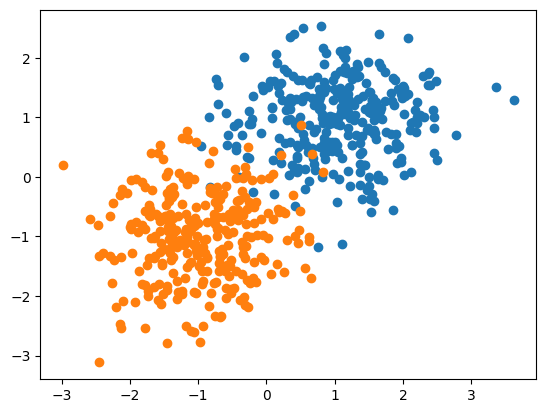

In [288]:
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])

# 3. Importez la module de régression logistique de scikit-learn 1 et lancer l’entrainement sur la base synthétique que vous venez de créer

In [289]:
y=np.array([0 if i <300 else 1 for i in range(600)])
X=np.concatenate((X1,X2),axis=0)

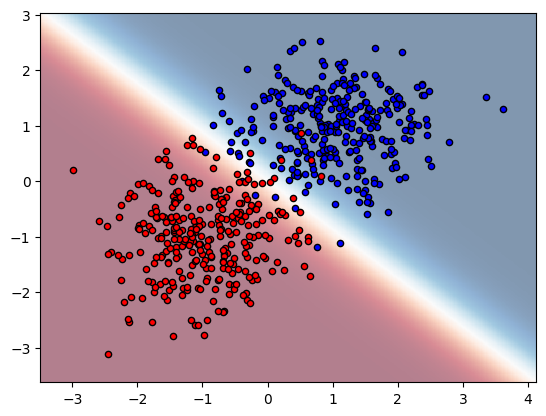

In [290]:
def mesh(X, h=0.02):
    x_min , x_max = X[:, 0]. min() - .5, X[:, 0]. max() + .5
    y_min , y_max = X[:, 1]. min() - .5, X[:, 1]. max() + .5
    xx , yy = np.meshgrid(np.arange(x_min , x_max , h), np.arange(y_min , y_max , h))
    return np.c_[xx.ravel (), yy.ravel ()], xx , yy
    
xtest_grid , xx , yy = mesh(X)
log_reg=LogisticRegression()
log_reg.fit(X,y)
Z = log_reg.predict_proba(xtest_grid)[:, 0]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx , yy , Z, cmap=plt.cm.RdBu , alpha =.5)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b', edgecolors="k", s=20)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', edgecolors="k", s=20)
plt.show()

# 2 Régression logistique sur le problème joue

In [306]:
class my_Logsitic:
    def __init__(self,backtrak=False):
        self.coef=[]
        self.backtrak=backtrak
        self.list_cost=[]

    def train(self,X,y,):
        self.coef,self.list_cost=self.logreg_descent(X, y)

    def costs(self):
        return self.list_cost
    
    #Utilisation de la methode de backtrak pour le pas optimal
    def step_backtrak(self,X,y,w,direction,step,beta):
        c=1e-4
        f_x=self.logreg_cost(X,y,w)
        while(self.logreg_cost(X,y,w+step*direction)>f_x-c*step*direction@direction) :
            step=step*beta
        return step
    
    # 1. Implémentation de la fonction qui le calcul du coût 
    def logreg_grad(self,X, y, w):
        z=X@w
        p=np.exp(z)/(1+np.exp(z))
        grad=-X.T@(y-p)
        return grad

    #1. Implémentation de la fonction qui le calcul le gradien 
    def logreg_cost(self,X, y, w):
        z=X@w
        cost=-(y@z)+np.sum(np.log(1+np.exp(z)))
        return cost
    
    # L’estimation des paramètres du modèle de regression logistique avec la méthode de descente de gradient
    def logreg_descent(self,X, y, learning_rate =1e-3, max_iter =1000):
        n, d = X.shape
        X = np.concatenate ((X, np.ones((n, 1))), axis =1)
        w0 = np.random.randn(d+1)
        step = learning_rate
        beta = 0.9 # for backtracking if needed - to tune
        cost=[]
        iteration=0
        if self.backtrak==True:
           step=self.step_backtrak(X,y,w0,-self.logreg_grad(X, y, w0),1e-3,beta)
        w=w0-step*self.logreg_grad(X, y, w0)
        cost.append(self.logreg_cost(X,y,w0))
        while np.linalg.norm(self.logreg_grad(X, y, w))>1e-6 and iteration<max_iter:
            if self.backtrak==True:
                step=self.step_backtrak(X,y,w,-self.logreg_grad(X, y, w),1e-3,beta)
            w=w-step*self.logreg_grad(X, y, w)
            iteration+=1
            cost.append(self.logreg_cost(X,y,w))
        
        return w[:-1],cost
    
    # La fonction qui calcule les probas à posteori des classes
    def calcul_proba(self,x):
        z=x@self.coef
        if len(x.shape)==1:
            p=np.exp(z)/(1+np.exp(z))
            return np.array([p,1-p])
        else:
            p=np.exp(z)/(1+np.exp(z))
            return np.array([[1-i,i] for i in p])
    #Predire les classe
    def predict(self,x):
       proba=self.calcul_proba(x)
       return np.array([np.argmax(i) for i in proba])
    def score(self,x,y):
        pred=self.predict(x)
        taux=sum([1 if pred[i]==y[i] else 0 for i in range(len(y))])/len(y)
        return taux


# 5. Affichez la fonction de décision résultante comme à l’exercice précédent. Commentez ce résultat.

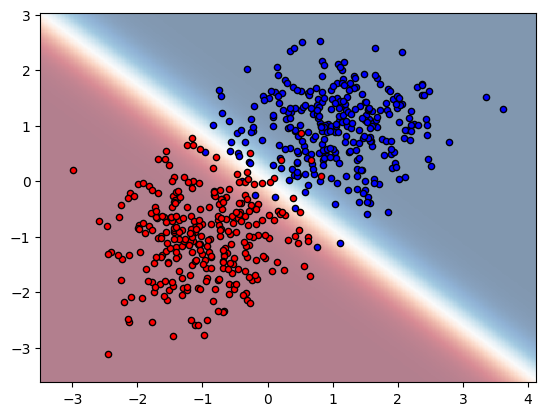

In [293]:
xtest_grid , xx , yy = mesh(X)
clf=my_Logsitic(backtrak=True)
clf.train(X,y)
Z = clf.calcul_proba(xtest_grid)[:,0]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx , yy , Z, cmap=plt.cm.RdBu , alpha =.5)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b', edgecolors="k", s=20)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', edgecolors="k", s=20)
plt.show()

# 6. Estimez les performances en généralisation de votre méthode.

In [294]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [295]:
clf=my_Logsitic(backtrak=True)
clf.train(X_train, Y_train)


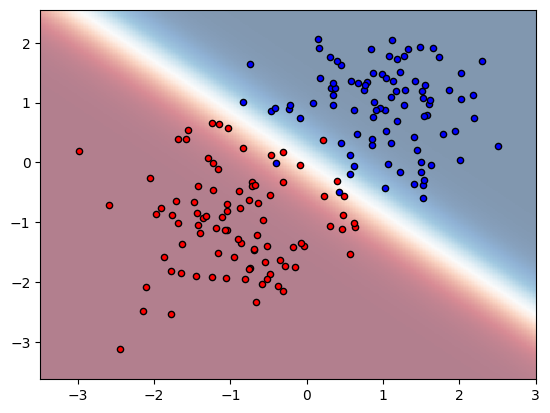

In [296]:
xtest_grid , xx , yy = mesh(X_test)
Z = clf.calcul_proba(xtest_grid)[:,0]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx , yy , Z, cmap=plt.cm.RdBu , alpha =.5)
plt.scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], c='b', edgecolors="k", s=20)
plt.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], c='r', edgecolors="k", s=20)
plt.show()

# 3 Diagnostique médical

In [326]:
data=load_breast_cancer()
target=data.target
data=data.data
X_train,X_test,Y_train,Y_test=train_test_split(data,target,test_size=0.3,stratify=target)
std=StandardScaler()
std.fit(X_train)
X_train=std.transform(X_train)
X_test=std.transform(X_test)

## 1. Comparez votre algorithme de régression logistique à l’implémentation de scikit-learn sur ce dataset. Les résultats seront présentés avec des taux de bonne classification moyen et des écart-types.

In [327]:
clf=LogisticRegression()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.9824561403508771

In [328]:
clf=my_Logsitic()
clf.train(X_train,Y_train)
clf.score(X_test,Y_test)

0.9883040935672515

## 2. Comparez maintenant avec un algorithme de regression logistique régularisée en utilisant l’implémentation de scikit-learn

In [335]:
clf=LogisticRegression(penalty="l2")
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.9824561403508771